decision tree classification

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")
data

,Income_Thousand,CIBIL_Score,Existing_Loan,Employment_Type,Age,Loan_Amount_Lakh,Loan_Status
0,71,757,Yes,Salaried,27,21,Approved
1,112,680,No,Business,28,17,Approved
2,34,701,No,Salaried,35,23,Approved
3,91,603,Yes,Business,49,5,Rejected
4,80,669,Yes,Salaried,53,22,Approved
...,...,...,...,...,...,...,...
295,51,619,Yes,Salaried,36,14,Rejected
296,28,801,Yes,Salaried,44,2,Approved
297,118,824,No,Business,39,4,Approved
298,38,731,No,Business,28,17,Approved


In [3]:
data["Existing_Loan"] = data["Existing_Loan"].map({"Yes":1,"No":0})
data["Employment_Type"] = data["Employment_Type"].map({"Salaried":1,"Business":0})
data["Loan_Status"] = data["Loan_Status"].map({"Approved":1,"Rejected":0})
data

,Income_Thousand,CIBIL_Score,Existing_Loan,Employment_Type,Age,Loan_Amount_Lakh,Loan_Status
0,71,757,1,1,27,21,1
1,112,680,0,0,28,17,1
2,34,701,0,1,35,23,1
3,91,603,1,0,49,5,0
4,80,669,1,1,53,22,1
...,...,...,...,...,...,...,...
295,51,619,1,1,36,14,0
296,28,801,1,1,44,2,1
297,118,824,0,0,39,4,1
298,38,731,0,0,28,17,1


In [4]:
X = data.drop("Loan_Status",axis=1)
y = data["Loan_Status"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [7]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
y_predict =model.predict(x_test)
print("accu",accuracy_score(y_test,y_predict))

accu 0.8166666666666667


In [9]:
new_cut = pd.DataFrame({
    'Income_Thousand': [70, 100, 30],
    'CIBIL_Score': [700, 780, 620],
    'Existing_Loan': [1, 0, 1],
    'Employment_Type': [1, 0, 1],
    'Age': [30, 45, 25],
    'Loan_Amount_Lakh': [15, 20, 10]
})


In [10]:
model.predict(new_cut)

array([1, 1, 1])

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,15))


<Figure size 8000x1500 with 0 Axes>

<Figure size 8000x1500 with 0 Axes>

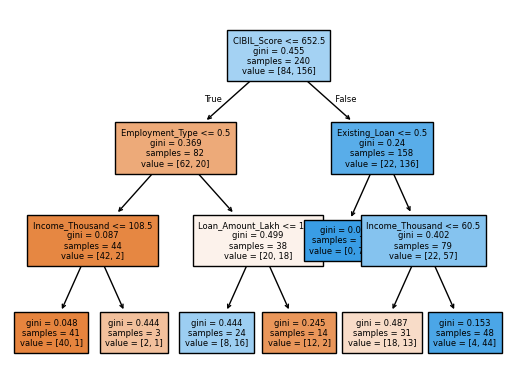

In [12]:
plot_tree(model,filled=True,feature_names=X.columns,fontsize=6)
plt.show()

In [13]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[10  6]
 [ 5 39]]


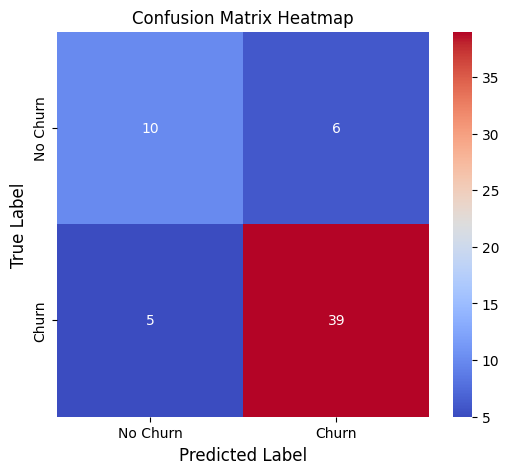

In [14]:
cm = confusion_matrix(y_test, y_predict)
class_names = ["No Churn", "Churn"]
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",              # shows integer values
    cmap="coolwarm",
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()